## 2. Basic Plotting using MatPlotLib

In this exercise, we will be plotting experimental data in Python using 'matplotlib'. (Explain what the purpose is of this exercise, why you will want this as an alternative to excel plots, and what some of the advantages are of using this method.)

# Exercise Outline
* Single line plot with annotation
* Multiple lines in one plot, using different styles and adding a legend
* Plot mean with sd as error bars
* Plot bar chart with mean and sd
* Save/export plot

First we need to import some libraries to setup the script

In [9]:
%pylab inline
import csv
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Next we have to import our data into the notebook. Our data is in a Comma Separated Values (.csv) file, we import the values into lists to use in our script. Next the values are loaded into a list. And to test that it worked, we print the list out to see the results.

In [10]:
results_list = np.loadtxt('datafiles/Labresults.csv',dtype={'names': ('Label', 'Concentration', 'Counts', 'Run'), 'formats': ('U15', 'i4', 'i4', 'i4')}, delimiter=',', skiprows=1)
print(results_list)

[('compound1', 10,   14, 1) ('compound2', 20,  570, 1)
 ('compound3', 30, 1302, 1) ('compound4', 40, 2838, 1)
 ('compound5', 50, 4212, 1) ('compound6', 60, 4590, 1)
 ('compound1', 10,  112, 2) ('compound2', 20,  780, 2)
 ('compound3', 30, 1523, 2) ('compound4', 40, 3301, 2)
 ('compound5', 50, 4710, 2) ('compound6', 60, 5424, 2)
 ('compound1', 10,    0, 3) ('compound2', 20,  123, 3)
 ('compound3', 30,  623, 3) ('compound4', 40, 2450, 3)
 ('compound5', 50, 3782, 3) ('compound6', 60, 4021, 3)]


We now have a list of tuples that contain the values for each measurement. There are three entries (or columns) in each tuple, and we want to create a graph based on this data. First define the x and the y axis. We can load this in the x and y from 'Results_list', but we do need to do some looping for that

In [11]:
x_results = []
y_results = []
for entries in results_list:
    x_results.append(int(entries[1]))
    y_results.append(int(entries[2]))

print(x_results)
print("Hallo")
print(y_results)

[10, 20, 30, 40, 50, 60, 10, 20, 30, 40, 50, 60, 10, 20, 30, 40, 50, 60]
Hallo
[14, 570, 1302, 2838, 4212, 4590, 112, 780, 1523, 3301, 4710, 5424, 0, 123, 623, 2450, 3782, 4021]


Now that we have the x and y points that need to be plotted, we can create the figure, create the axes and finally label them. First, create a plot for only 'Run 1' or the first 6 entries in the list.

[(0, 6000)]

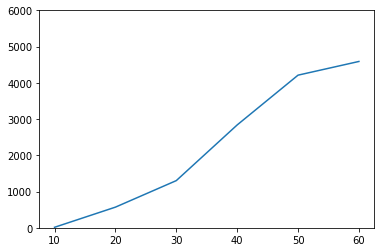

In [12]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_ylim(bottom=0, top=6000, auto=True)
ax.plot(x_results[:6],y_results[:6]) 
ax.set(ylim=[0,6000])

Next, create a line for each of the runs in the same plot. For now, leave out all the formatting, and focus on separating the y-values correctly.

[(0, 6000)]

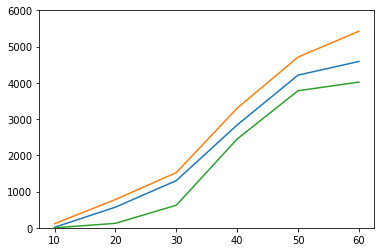

In [13]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_ylim(bottom=0, top=6000, auto=True)
ax.plot(x_results[:6],y_results[:6])
ax.plot(x_results[:6],y_results[6:12])
ax.plot(x_results[:6],y_results[12:])
ax.set(ylim=[0,6000])

Next, annotation needs to be added. First, the graph itself needs a name, and the y and x axes should be named. This can be done in ax.set.
Add names to the lines, by adding a label in the ax.plot calls for each series. Label them with 'Run 1', 'Run 2', 'Run 3'.
Finally, add a legend as well to complete the picture.

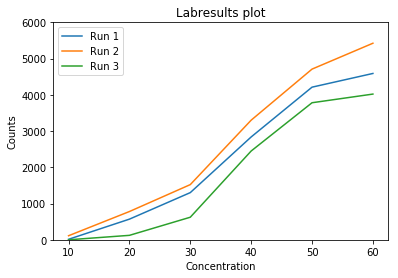

In [14]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_ylim(bottom=0, top=6000, auto=True)
ax.plot(x_results[:6],y_results[:6], label='Run 1')
ax.plot(x_results[:6],y_results[6:12], label='Run 2')
ax.plot(x_results[:6],y_results[12:], label='Run 3')
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,6000])
ax.legend(loc=2)

To follow this up, we want to get the mean of the three runs for each concentration, calculate the sd and then plot the error bars, all with only 1 line displayed in the port. Note that you have to calculate the mean over an interval of 6. However there is a trick to calculate this with np.

[  42.          491.         1149.33333333 2863.         4234.66666667
 4678.33333333]
[ 49.82636518 273.97445136 382.95372508 347.8687492  379.19329577
 576.16799248]


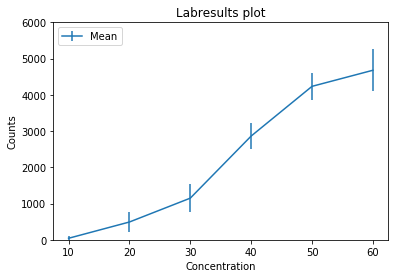

In [15]:
results_ymean = np.mean(np.asarray(y_results).reshape(-1,6), axis=0) #keep this line in
results_ystd = np.std(np.asarray(y_results).reshape(-1,6), axis=0) #keep this line in
print(results_ymean)
print(results_ystd)

fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_ylim(bottom=0, top=6000, auto=True)
ax.errorbar(x_results[:6],results_ymean, yerr=results_ystd, label='Mean') #keep this line in
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,6000])
ax.legend(loc=2)